# Chapter 3. Bar Graphs

> There’s an important distinction you should be aware of when making bar graphs: sometimes the bar heights represent *counts* of cases in the data set, and sometimes they represent *values* in the data set. Keep this distinction in mind—it can be a source of confusion since they have very different relationships to the data, but the same term is used for both.

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 3.1 Making a Basic Bar Graph

In [2]:
summary(gcookbook::pg_mean)
head(gcookbook::pg_mean)
?gcookbook::pg_mean

  group       weight     
 ctrl:1   Min.   :4.661  
 trt1:1   1st Qu.:4.846  
 trt2:1   Median :5.032  
          Mean   :5.073  
          3rd Qu.:5.279  
          Max.   :5.526  

,group,weight
,<fct>,<dbl>
1,ctrl,5.032
2,trt1,4.661
3,trt2,5.526


pg_mean {gcookbook},R Documentation


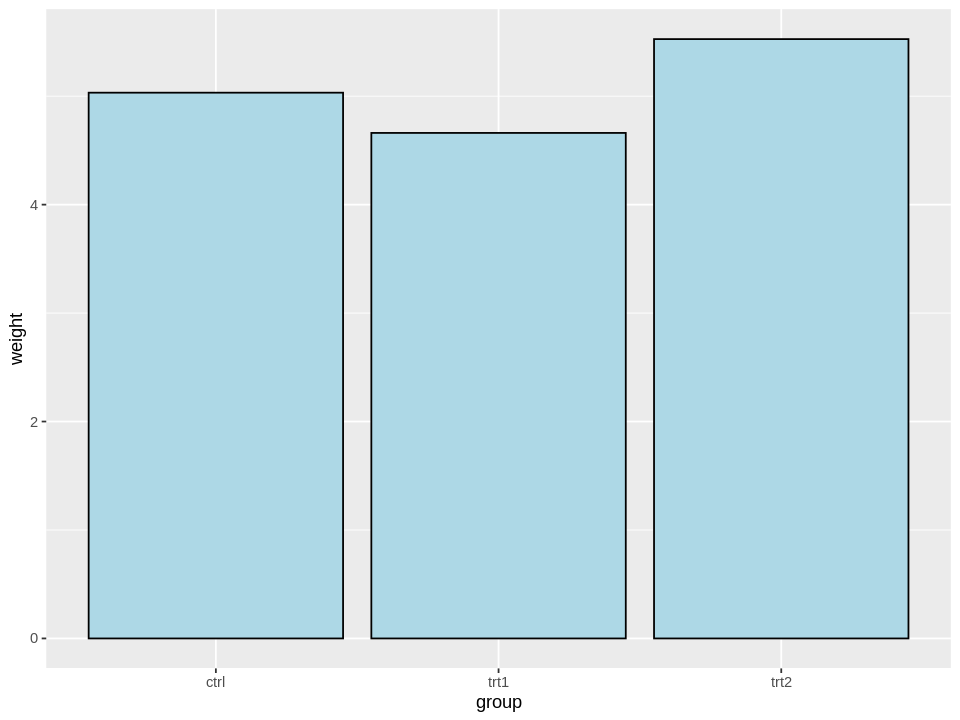

In [3]:
ggplot(gcookbook::pg_mean, aes(group, weight)) + geom_col(color = "black", fill = "lightblue")

> In previous versions of **ggplot2**, the recommended way to create a bar graph of values was to use `geom_bar(stat = "identity")`. As of **ggplot2** 2.2.0, there is a `geom_col()` function that does the same thing.

## 3.2 Grouping Bars Together

In [4]:
summary(gcookbook::cabbage_exp)
head(gcookbook::cabbage_exp)
?gcookbook::cabbage_exp

 Cultivar  Date       Weight            sd               n     
 c39:3    d16:2   Min.   :1.470   Min.   :0.2111   Min.   :10  
 c52:3    d20:2   1st Qu.:2.380   1st Qu.:0.3205   1st Qu.:10  
          d21:2   Median :2.770   Median :0.6180   Median :10  
                  Mean   :2.593   Mean   :0.6110   Mean   :10  
                  3rd Qu.:3.033   3rd Qu.:0.9152   3rd Qu.:10  
                  Max.   :3.180   Max.   :0.9834   Max.   :10  
       se         
 Min.   :0.06675  
 1st Qu.:0.10134  
 Median :0.19544  
 Mean   :0.19322  
 3rd Qu.:0.28940  
 Max.   :0.31098  

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171
3,c39,d21,2.74,0.9834181,10,0.31098410
4,c52,d16,2.26,0.4452215,10,0.14079141
5,c52,d20,3.11,0.7908505,10,0.25008887
6,c52,d21,1.47,0.2110819,10,0.06674995


cabbage_exp {gcookbook},R Documentation


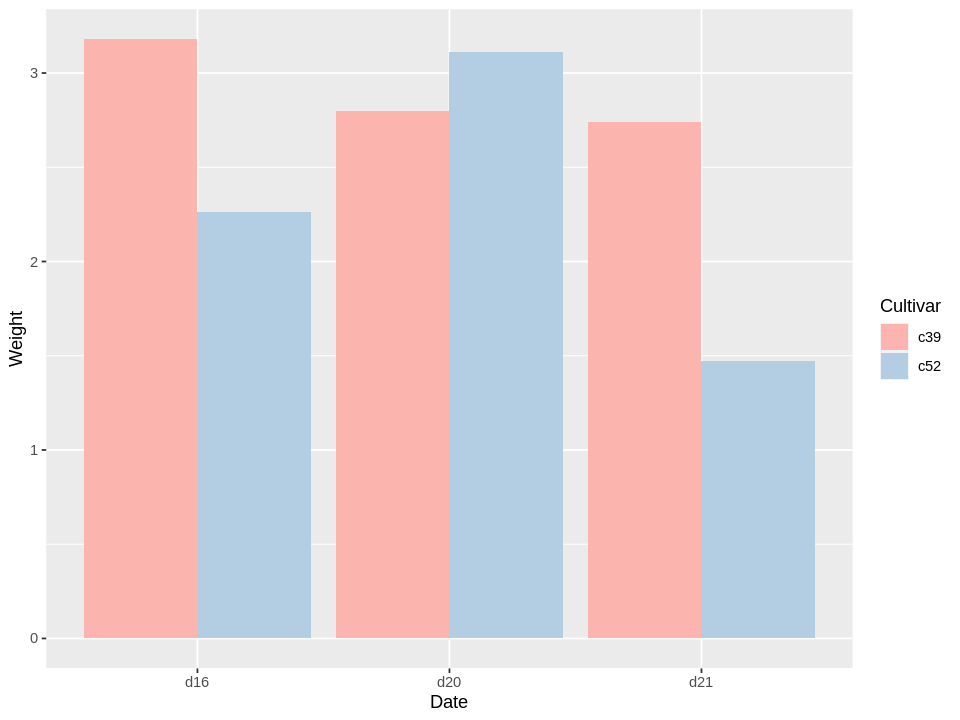

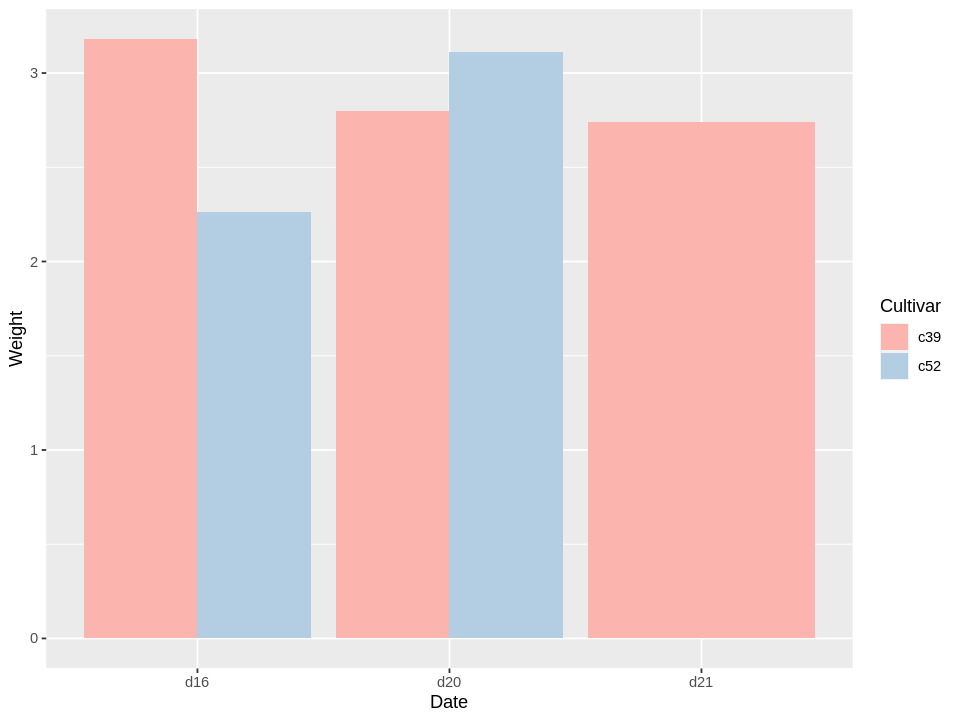

In [5]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
  geom_col(position = "dodge") +
  scale_fill_brewer(palette = "Pastel1")

gcookbook::cabbage_exp %>%
  head(5) %>%
  ggplot(aes(Date, Weight, fill = Cultivar)) +
  geom_col(position = "dodge") +
  scale_fill_brewer(palette = "Pastel1")

> If your data has this issue, you can manually make an entry for the missing factor level combination with an `NA` for the `y` variable.

## 3.3 Making a Bar Graph of Counts

In [6]:
summary(diamonds)
print(diamonds)
?diamonds

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


diamonds {ggplot2},R Documentation


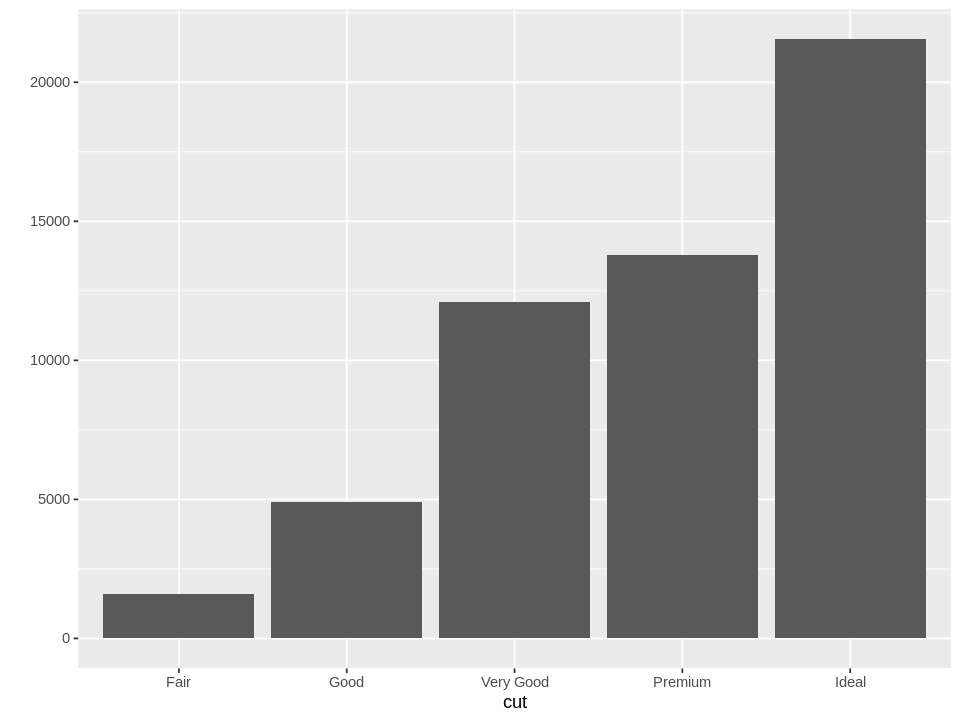

In [7]:
qplot(cut, data = diamonds, geom = "bar")

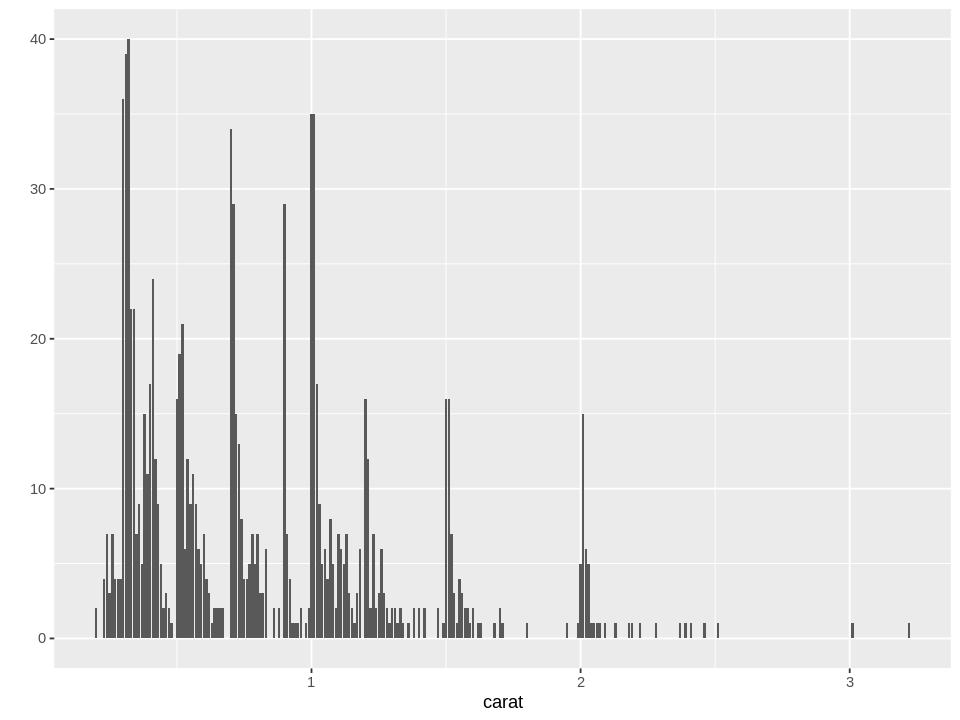

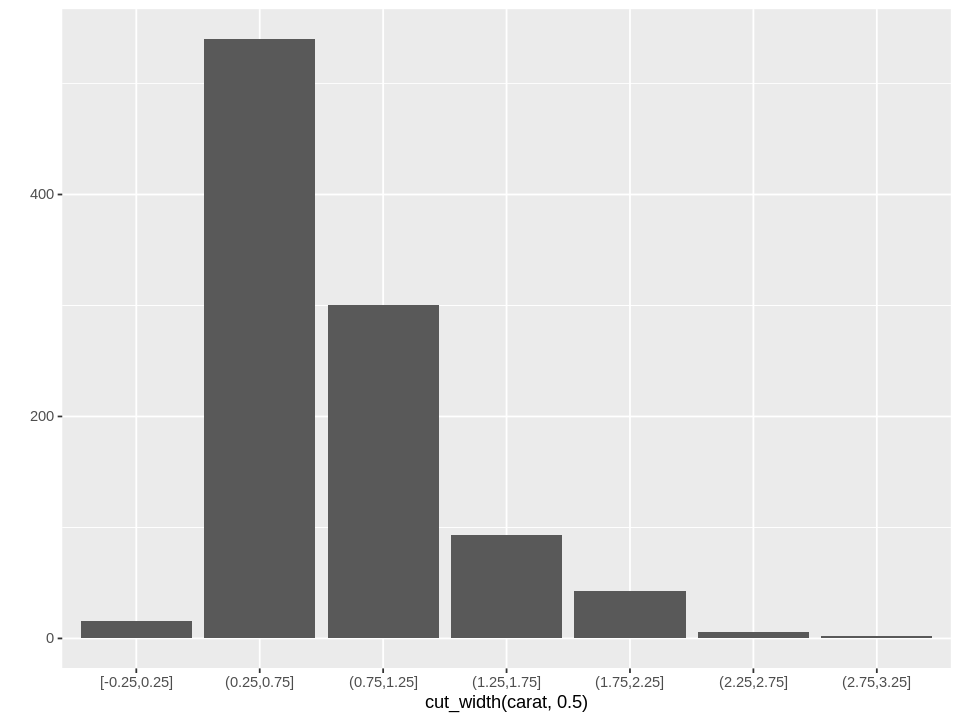

In [8]:
set.seed(0)
slice_sample(diamonds, n = 1000) %>% qplot(carat, data = ., geom = "bar")
set.seed(0)
slice_sample(diamonds, n = 1000) %>% qplot(cut_width(carat, .5), data = ., geom = "bar")

## 3.4 Using Colors in a Bar Graph

In [9]:
summary(gcookbook::uspopchange)
head(gcookbook::uspopchange)
?gcookbook::uspopchange

    State               Abb                      Region       Change      
 Length:50          Length:50          Northeast    : 9   Min.   :-0.600  
 Class :character   Class :character   South        :16   1st Qu.: 4.350  
 Mode  :character   Mode  :character   North Central:12   Median : 7.850  
                                       West         :13   Mean   : 9.852  
                                                          3rd Qu.:13.900  
                                                          Max.   :35.100  

,State,Abb,Region,Change
,<chr>,<chr>,<fct>,<dbl>
1,Alabama,AL,South,7.5
2,Alaska,AK,West,13.3
3,Arizona,AZ,West,24.6
4,Arkansas,AR,South,9.1
5,California,CA,West,10.0
6,Colorado,CO,West,16.9


uspopchange {gcookbook},R Documentation


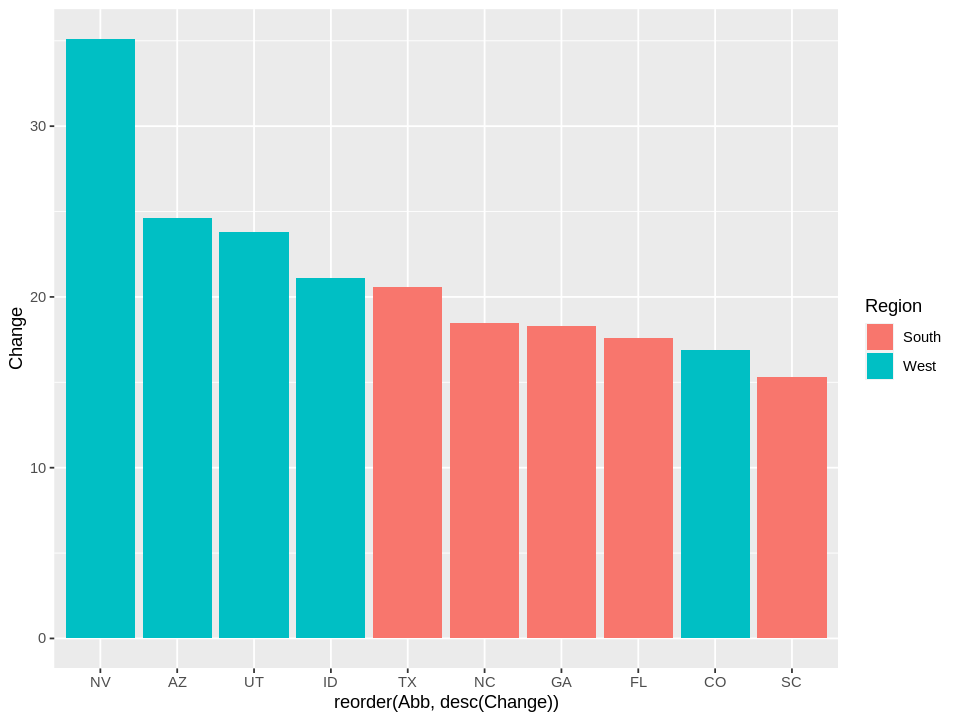

In [10]:
slice_max(gcookbook::uspopchange, Change, n = 10) %>%
  qplot(reorder(Abb, desc(Change)), Change, fill = Region, data = ., geom = "col")

## 3.5 Coloring Negative and Positive Bars Differently

In [11]:
summary(gcookbook::climate)
head(gcookbook::climate)
?gcookbook::climate

    Source               Year        Anomaly1y          Anomaly5y      
 Length:499         Min.   :1800   Min.   :-0.60070   Min.   :-0.4995  
 Class :character   1st Qu.:1884   1st Qu.:-0.21629   1st Qu.:-0.1053  
 Mode  :character   Median :1926   Median :-0.02797   Median :-0.0042  
                    Mean   :1923   Mean   : 0.01277   Mean   : 0.0555  
                    3rd Qu.:1968   3rd Qu.: 0.15155   3rd Qu.: 0.1620  
                    Max.   :2011   Max.   : 0.96354   Max.   : 0.8953  
                                   NA's   :207        NA's   :373      
   Anomaly10y           Unc10y      
 Min.   :-1.01500   Min.   :0.0110  
 1st Qu.:-0.28350   1st Qu.:0.0430  
 Median :-0.07328   Median :0.1040  
 Mean   :-0.07869   Mean   :0.1452  
 3rd Qu.: 0.05065   3rd Qu.:0.2220  
 Max.   : 0.88400   Max.   :0.5050  
 NA's   :20         NA's   :294     

,Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Berkeley,1800,NA,NA,-0.435,0.505
2,Berkeley,1801,NA,NA,-0.453,0.493
3,Berkeley,1802,NA,NA,-0.460,0.486
4,Berkeley,1803,NA,NA,-0.493,0.489
5,Berkeley,1804,NA,NA,-0.536,0.483
6,Berkeley,1805,NA,NA,-0.541,0.475


climate {gcookbook},R Documentation


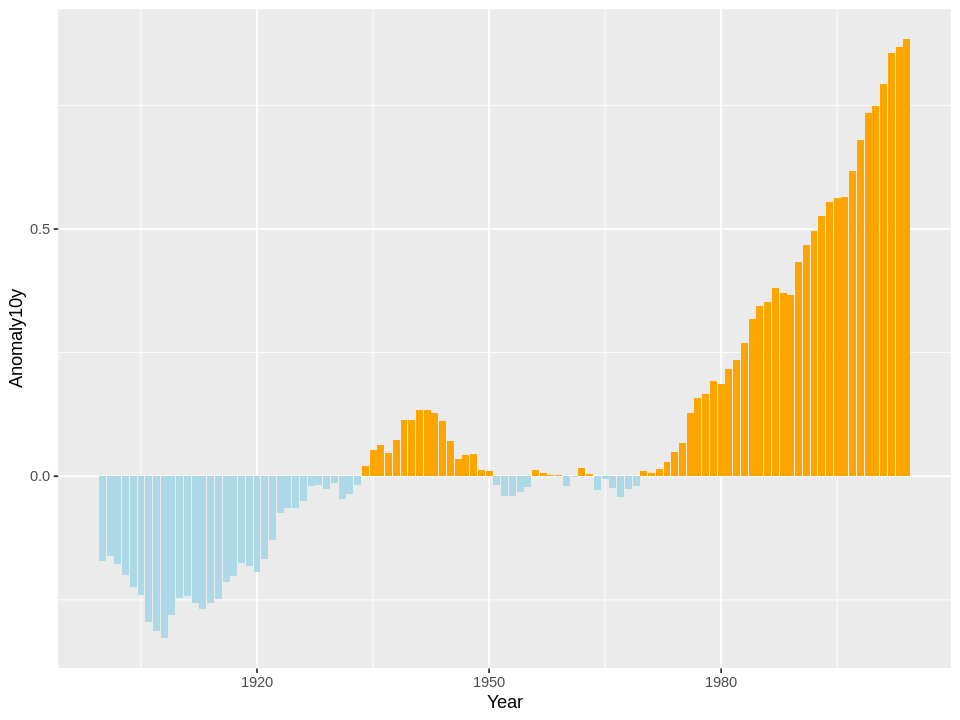

In [12]:
gcookbook::climate %>%
  filter(Source == "Berkeley", Year >= 1900) %>%
  qplot(Year, Anomaly10y, fill = Anomaly10y > 0, data = ., geom = "col") +
  scale_fill_manual(values = c("lightblue", "orange"), guide = FALSE)

## 3.6 Adjusting Bar Width and Spacing

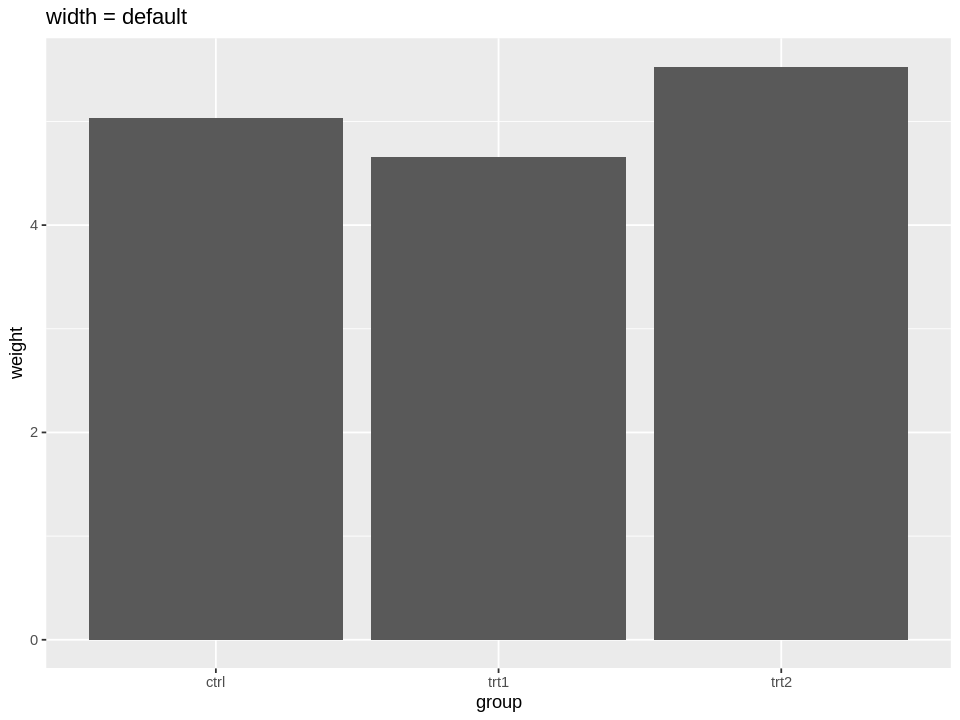

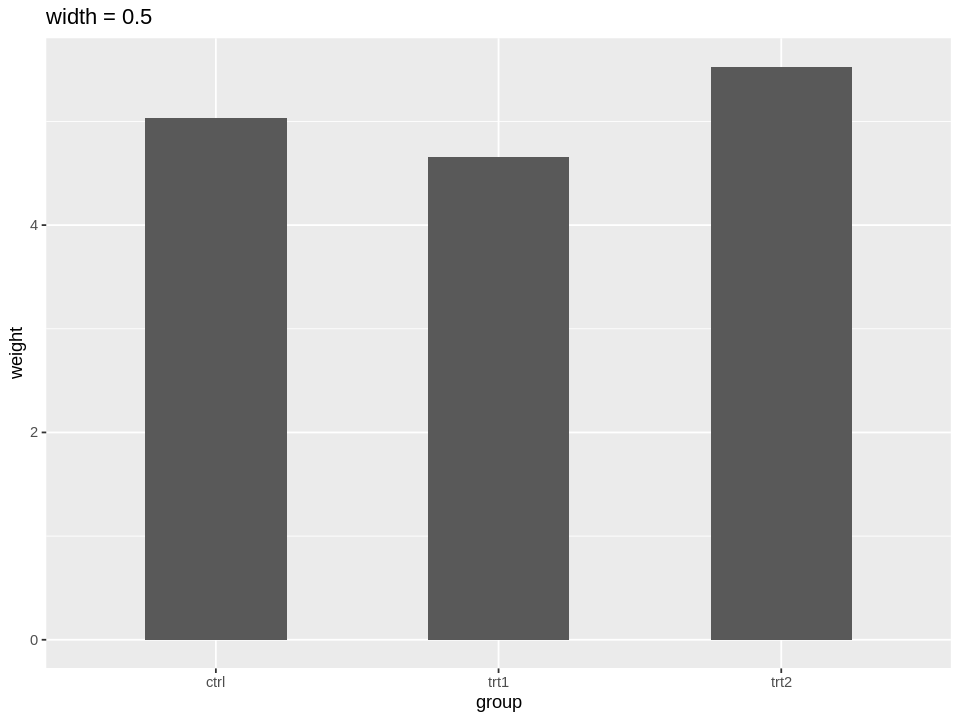

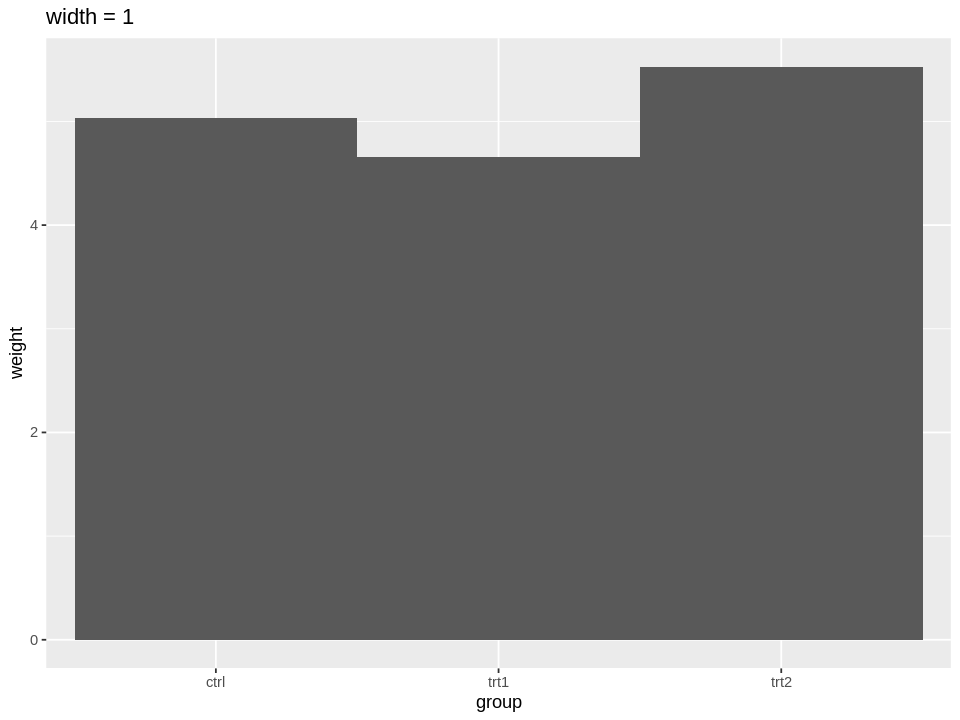

In [13]:
for (width in list(NULL, .5, 1)) {
  print(
    ggplot(gcookbook::pg_mean, aes(group, weight)) +
      geom_col(width = width) +
      labs(title = case_when(
        all(is.na(width)) ~ "width = default",
        TRUE ~ str_interp("width = ${width}")
      ))
  )
}

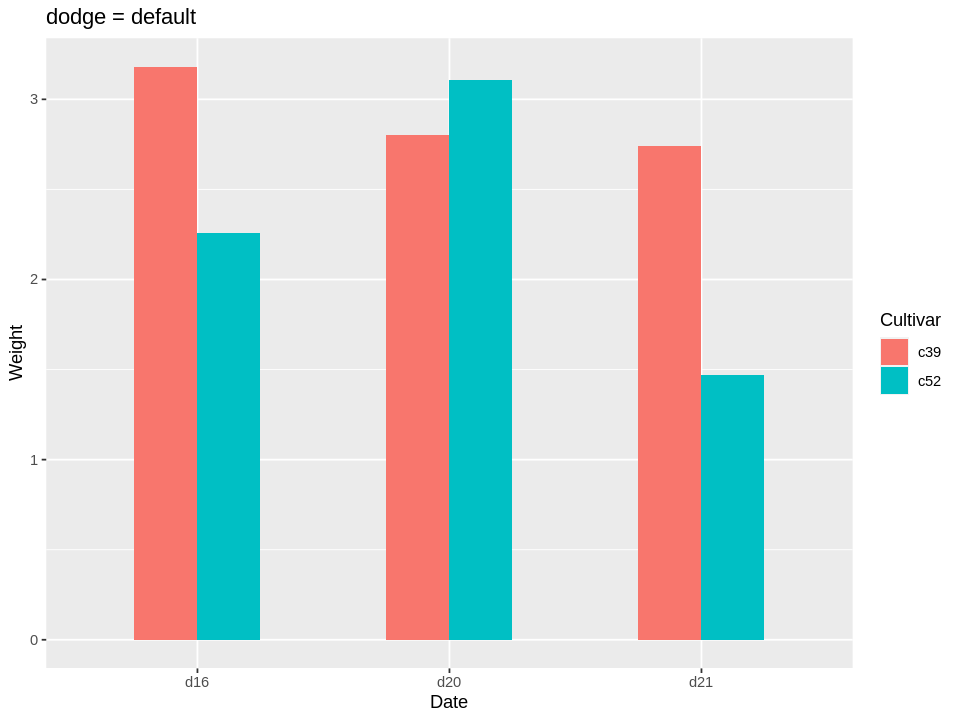

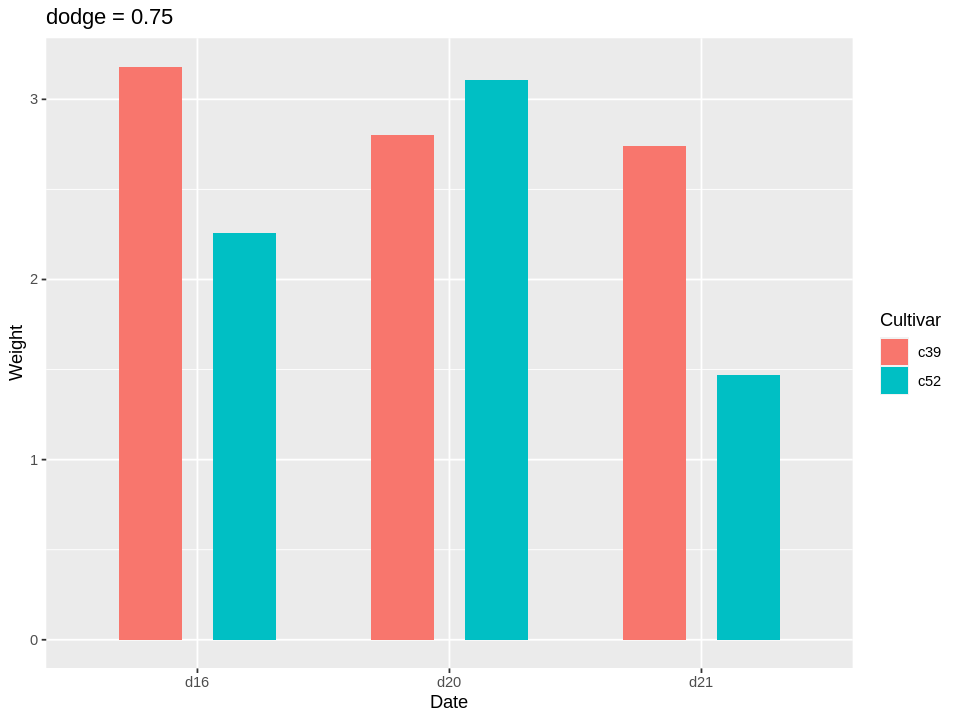

In [14]:
for (dodge in list(NULL, .75)) {
  print(
    ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
      geom_col(width = .5, position = position_dodge(dodge)) +
      labs(title = case_when(
        all(is.na(dodge)) ~ "dodge = default",
        TRUE ~ str_interp("dodge = ${dodge}")
      ))
  )
}

## 3.7 Making a Stacked Bar Graph

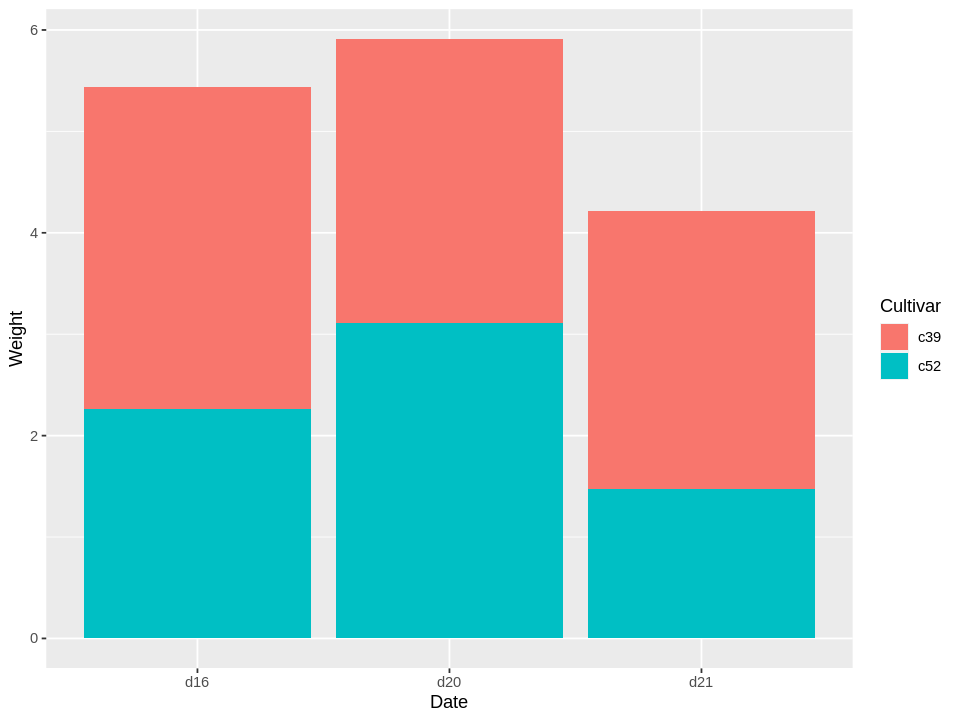

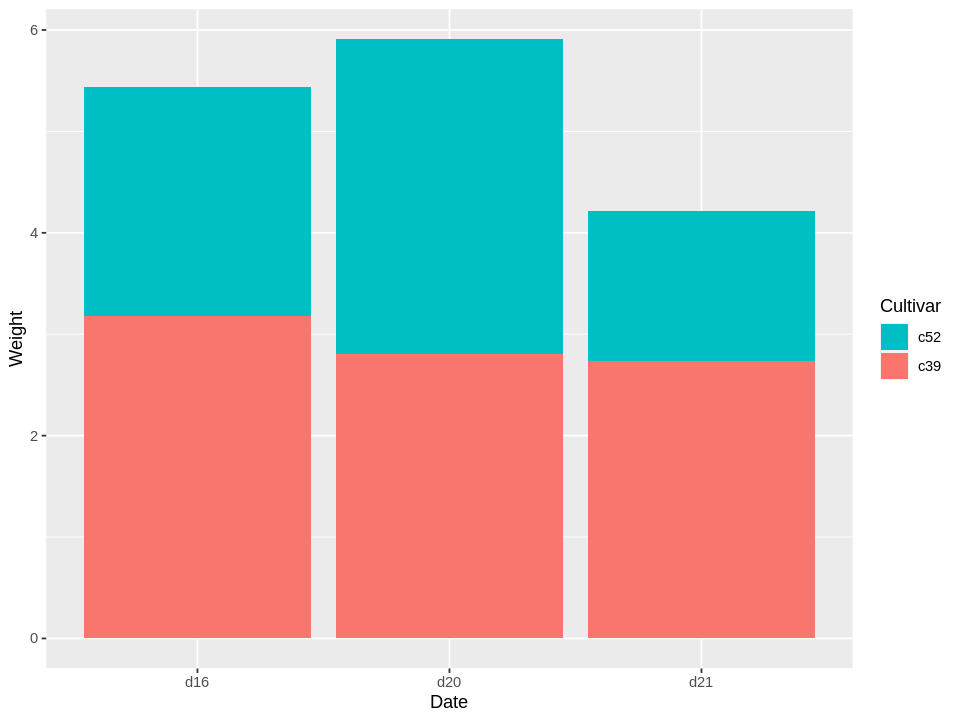

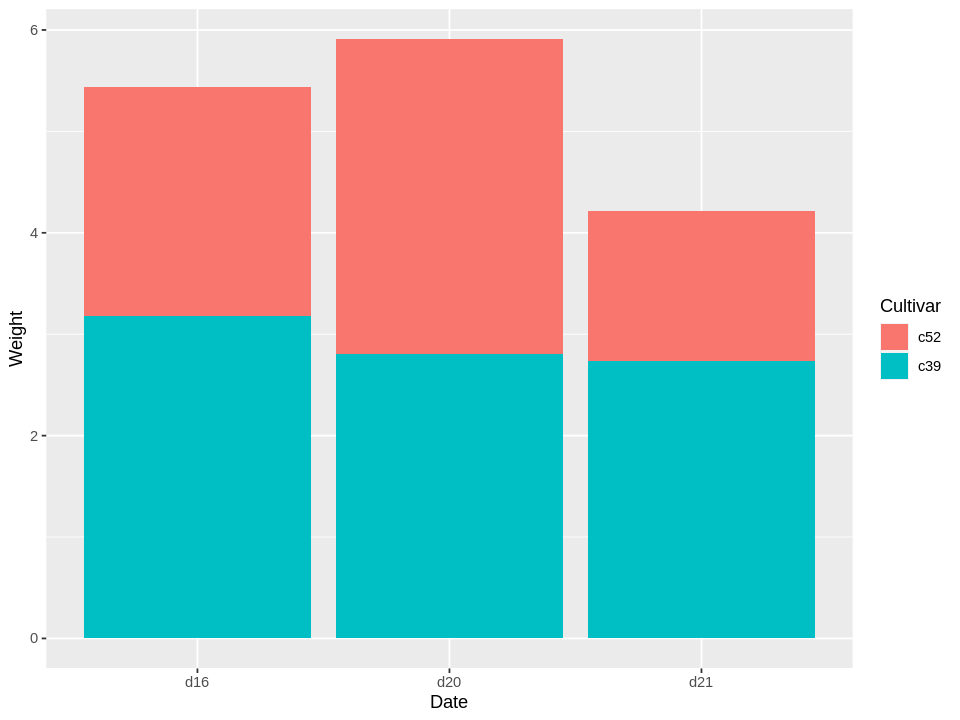

In [15]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
  geom_col()

ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
  geom_col(position = position_stack(reverse = TRUE)) +
  guides(fill = guide_legend(reverse = TRUE))

ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = reorder(Cultivar, desc(Cultivar)))) +
  geom_col() +
  labs(fill = "Cultivar")

## 3.8 Making a Proportional Stacked Bar Graph

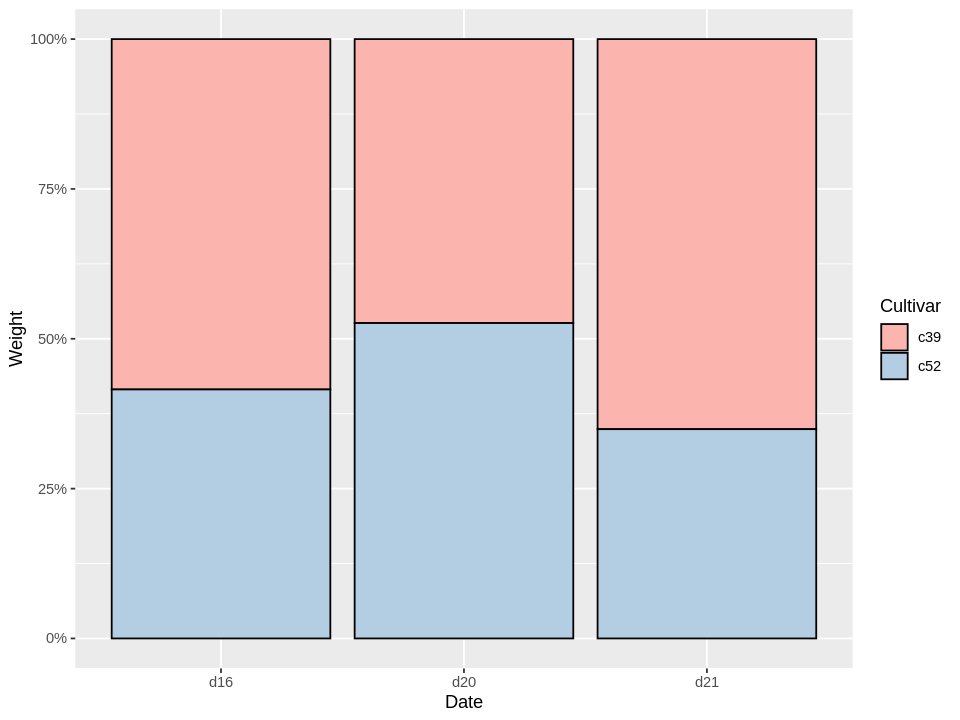

In [16]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight, fill = Cultivar)) +
  geom_col(color = "black", position = "fill") +
  scale_fill_brewer(palette = "Pastel1") +
  scale_y_continuous(labels = scales::percent) 

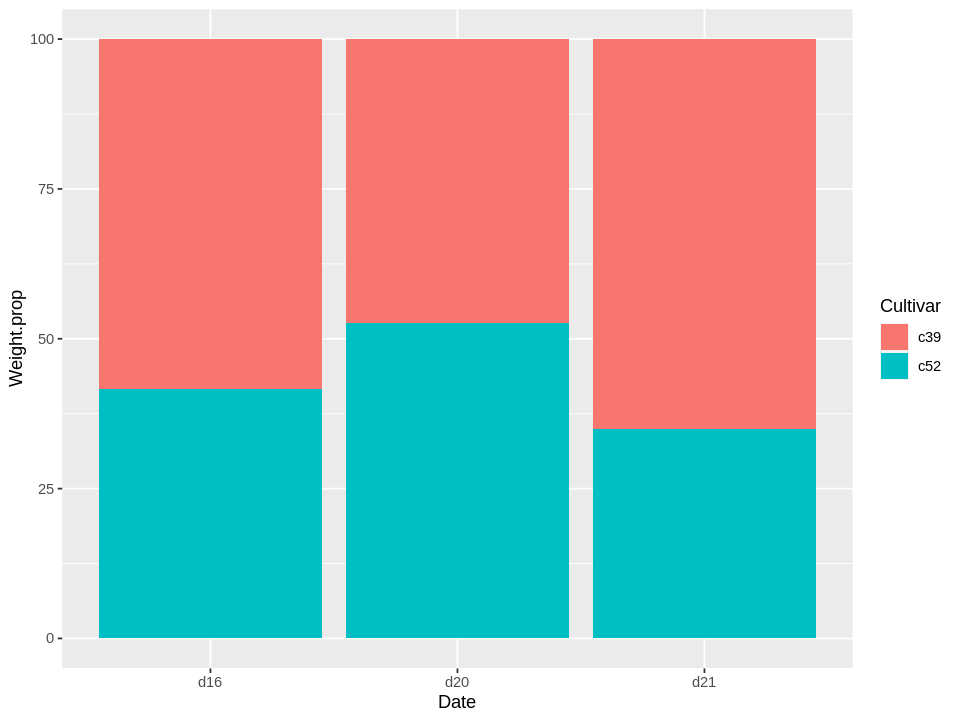

In [17]:
gcookbook::cabbage_exp %>%
  group_by(Date) %>%
  mutate(Weight.prop = Weight / sum(Weight) * 100) %>%
  qplot(Date, Weight.prop, fill = Cultivar, data = ., geom = "col")

## 3.9 Adding Labels to a Bar Graph

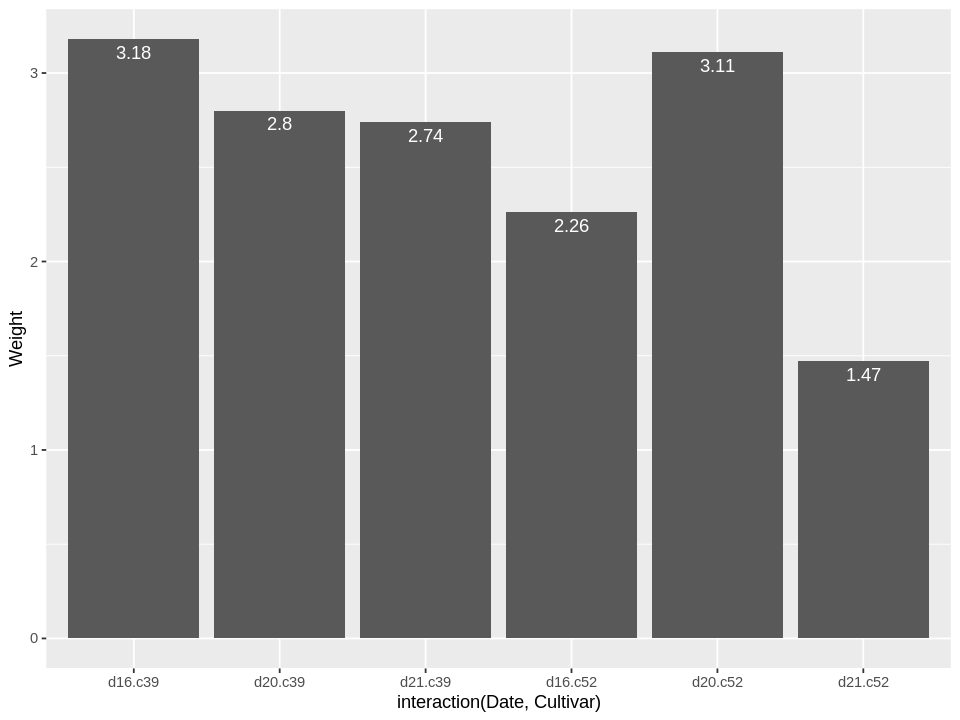

In [18]:
ggplot(gcookbook::cabbage_exp, aes(interaction(Date, Cultivar), Weight, label = Weight)) +
  geom_col() +
  geom_text(color = "white", vjust = 1.5)

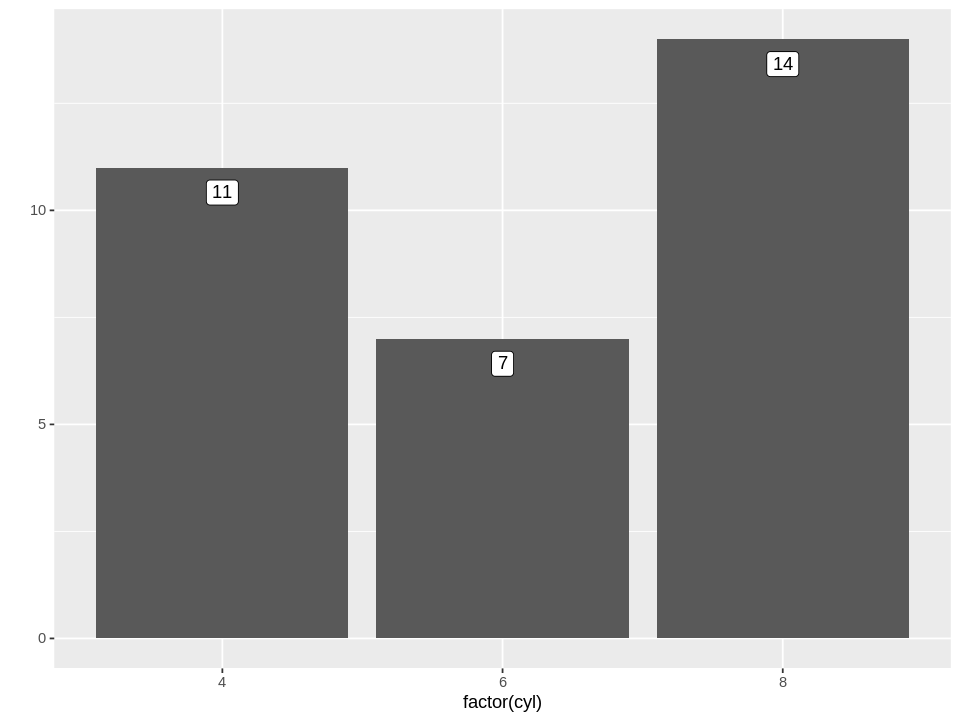

In [19]:
qplot(factor(cyl), data = mtcars, geom = "bar") +
  geom_label(aes(label = ..count..), stat = "count", vjust = 1.5)

## 3.10 Making a Cleveland Dot Plot

> Cleveland dot plots are an alternative to bar graphs that reduce visual clutter and can be easier to read.

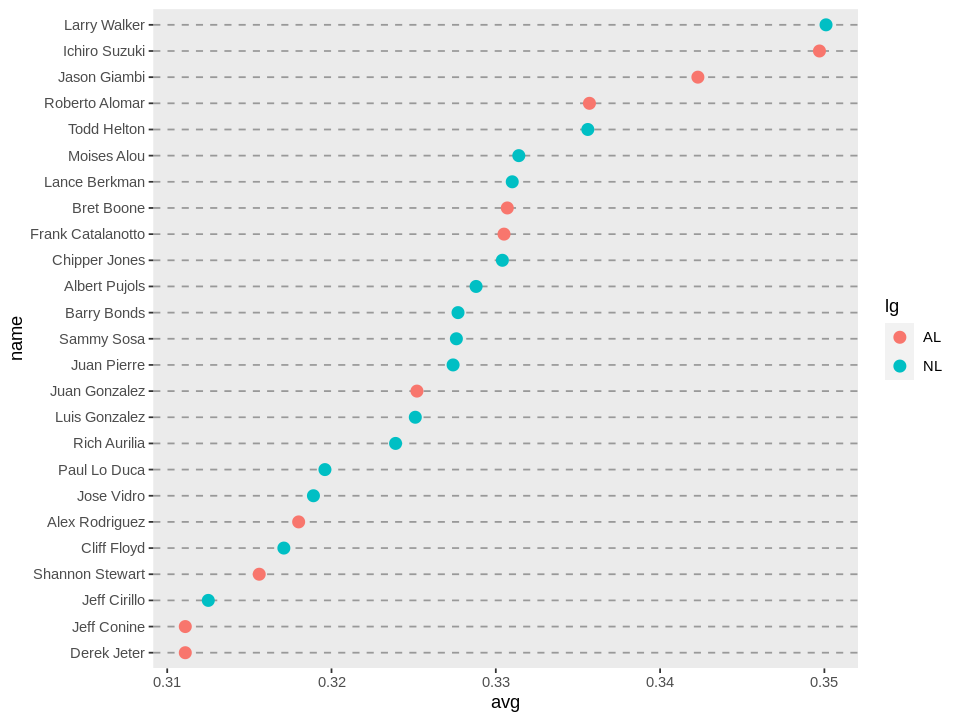

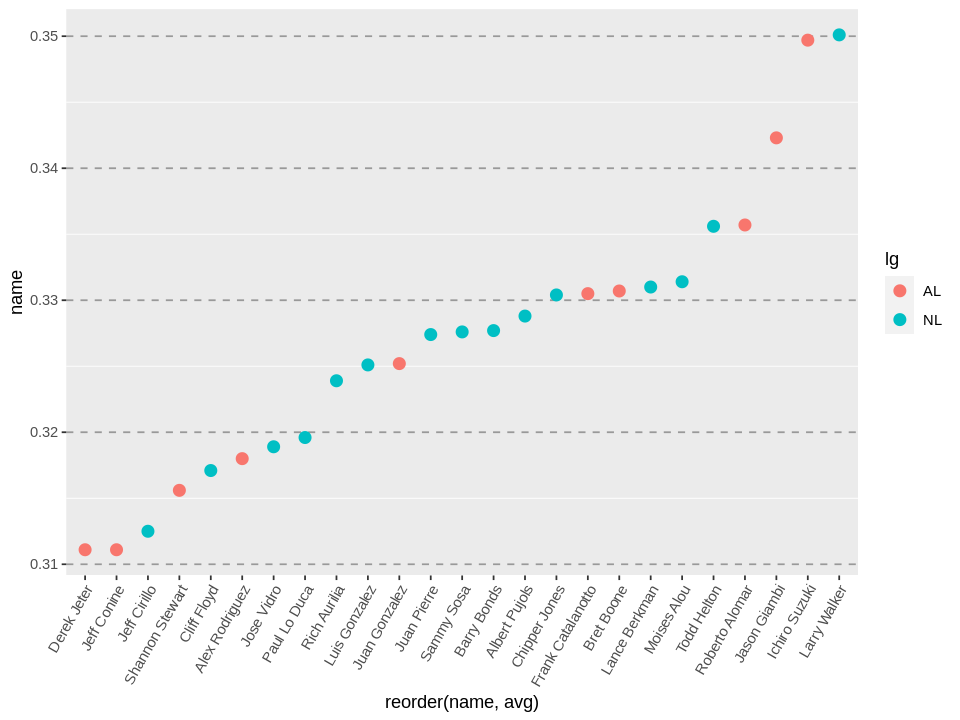

In [20]:
slice_max(gcookbook::tophitters2001, avg, n = 25) %>%
  ggplot(aes(avg, reorder(name, avg), color = lg)) +
  geom_point(size = 3) +
  labs(y = "name") +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "grey60", linetype = "dashed"),
  )

slice_max(gcookbook::tophitters2001, avg, n = 25) %>%
  ggplot(aes(reorder(name, avg), avg, color = lg)) +
  geom_point(size = 3) +
  labs(y = "name") +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_line(color = "grey60", linetype = "dashed"),
    axis.text.x = element_text(angle = 60, hjust = 1)
  )

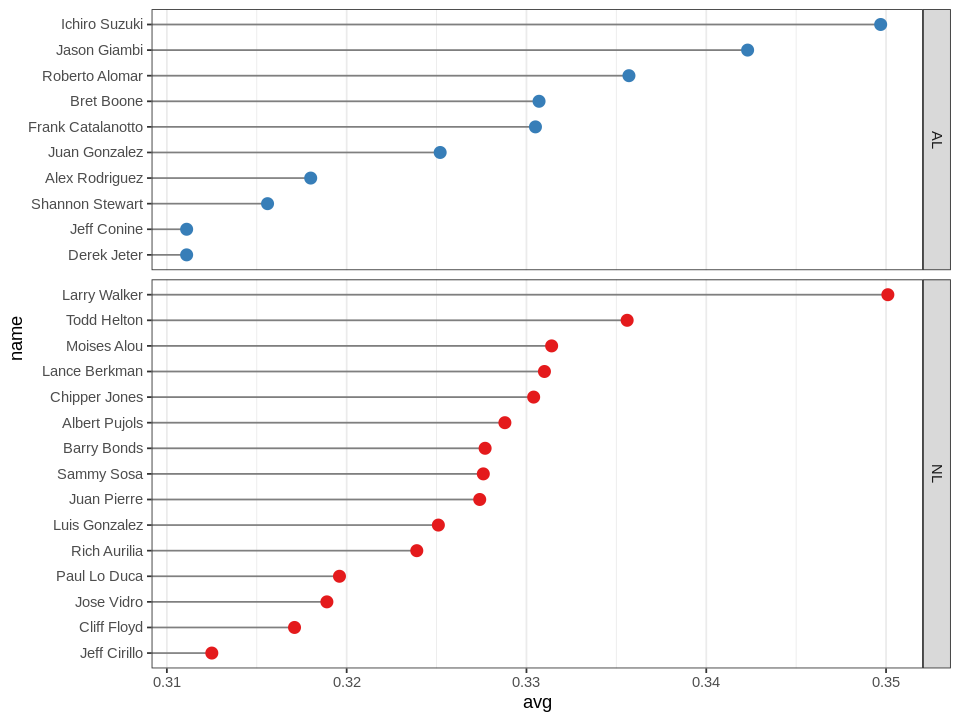

In [21]:
slice_max(gcookbook::tophitters2001, avg, n = 25) %>%
  ggplot(aes(avg, reorder(name, avg))) +
  geom_segment(aes(yend = name), color = "grey50", xend = 0) +
  geom_point(aes(color = lg), size = 3) +
  scale_colour_brewer(palette = "Set1", limits = c("NL", "AL"), guide = FALSE) +
  labs(y = "name") +
  theme_bw() +
  theme(panel.grid.major.y = element_blank()) +
  facet_grid(lg ~ ., scales = "free_y", space = "free_y")